In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [2]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [3]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [4]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   tb         300 non-null    int64         
 4   longitude  300 non-null    float64       
 5   latitude   300 non-null    float64       
 6   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 14.2+ KB


Merapihkan Data TB 2018-2023

In [5]:
import calendar

In [6]:
# Filter for years 2018-2022
df_tb = df_excel[(df_excel['year'] >= 2018) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT, month, and time
tb_total = df_tb.groupby(['KABKOT', 'month'])['tb'].sum()
tb_total

KABKOT           month
JAKARTA BARAT    1        3404
                 2        2822
                 3        3223
                 4        3053
                 5        2812
                 6        2678
                 7        2851
                 8        2970
                 9        3086
                 10       3191
                 11       3231
                 12       2867
JAKARTA PUSAT    1        3100
                 2        2371
                 3        2598
                 4        2447
                 5        2199
                 6        2108
                 7        2473
                 8        2417
                 9        2348
                 10       2076
                 11       2090
                 12       1970
JAKARTA SELATAN  1        3086
                 2        2470
                 3        2809
                 4        2710
                 5        2376
                 6        2541
                 7        2793
                

Merapihkan Data Kelembapan (rh) 2018-2023

In [8]:
df_rh = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/kelembaban/dissolved_result_rh.csv')
df_rh = df_rh.drop(['Unnamed: 0'], axis=1)
print(df_rh.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'rh', 'time'], dtype='object')


In [9]:
# Filter for years 2018-2022
df_rh = df_rh[(df_rh['year'] >= 2018) & (df_rh['year'] <= 2022)]

# Group rh_mean by KABKOT and month
rh_mean = df_rh.groupby(['KABKOT', 'month'])['rh'].mean()
rh_mean

KABKOT           month
JAKARTA BARAT    1        84.136462
                 2        85.301538
                 3        83.478376
                 4        83.119352
                 5        81.919704
                 6        80.470796
                 7        75.992514
                 8        74.747955
                 9        74.609813
                 10       76.345355
                 11       80.205501
                 12       82.572568
JAKARTA PUSAT    1        84.241383
                 2        85.504867
                 3        83.588739
                 4        83.170150
                 5        81.883076
                 6        80.506588
                 7        76.042754
                 8        74.767871
                 9        74.473330
                 10       76.653341
                 11       80.647847
                 12       82.701963
JAKARTA SELATAN  1        84.540954
                 2        85.823629
                 3        83.791878
     

Merge Files

In [10]:
# Merge DataFrames on 'KABKOT', 'month', and 'time'
df_tb_rh = pd.merge(tb_total, rh_mean, on=['KABKOT', 'month'])
df_tb_rh

tb         rh
KABKOT          month                 
JAKARTA BARAT   1      3404  84.136462
                2      2822  85.301538
                3      3223  83.478376
                4      3053  83.119352
                5      2812  81.919704
                6      2678  80.470796
                7      2851  75.992514
                8      2970  74.747955
                9      3086  74.609813
                10     3191  76.345355
                11     3231  80.205501
                12     2867  82.572568
JAKARTA PUSAT   1      3100  84.241383
                2      2371  85.504867
                3      2598  83.588739
                4      2447  83.170150
                5      2199  81.883076
                6      2108  80.506588
                7      2473  76.042754
                8      2417  74.767871
                9      2348  74.473330
                10     2076  76.653341
                11     2090  80.647847
                12     1970  82.701963
JAKARTA SELATAN 1      3086  84.540954
                2      2470  85.823629
                3      2809  83.791878
                4      2710  83.488625
                5      2376  82.110082
                6      2541  80.681330
                7      2793  75.708220
                8      2691  74.537322
                9      2720  74.330118
                10     2477  76.752429
                11     2285  80.811946
                12     2155  82.988795
JAKARTA TIMUR   1      4791  84.530151
                2      3751  85.872577
                3      4836  83.907648
                4      4400  83.456792
                5      3831  82.055971
                6      3882  80.765354
                7      4265  76.262358
                8      4318  75.008375
                9      4573  74.657764
                10     3732  77.243441
                11     3475  81.230609
                12     3275  83.051423
JAKARTA UTARA   1      2541  84.112287
                2      1856  85.256014
                3      2181  83.463090
                4      2105  82.967041
                5      1941  81.850632
                6      1834  80.649720
                7      2035  76.841552
                8      2135  75.635157
                9      2135  75.325903
                10     1812  77.138230
                11     1811  80.655524
                12     1686  82.587139

In [11]:
df_tb_rh = df_tb_rh.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'rh':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [12]:
df_tb_rh

,KABKOT,month,tb,rh
0,JAKARTA BARAT,1,3404,84.136462
1,JAKARTA BARAT,2,2822,85.301538
2,JAKARTA BARAT,3,3223,83.478376
3,JAKARTA BARAT,4,3053,83.119352
4,JAKARTA BARAT,5,2812,81.919704
5,JAKARTA BARAT,6,2678,80.470796
6,JAKARTA BARAT,7,2851,75.992514
7,JAKARTA BARAT,8,2970,74.747955
8,JAKARTA BARAT,9,3086,74.609813
9,JAKARTA BARAT,10,3191,76.345355


In [13]:
df_tb_rh.shape

(60, 4)

In [14]:
#df_tb_rh.to_csv("/Users/Jia/Downloads/data_skripsi/a_overlay/tb_rh.csv")

Datetime edit for 'month'

In [15]:
import calendar

# Format for monthly graph
df_tb_rh['month'] = pd.to_datetime(df_tb_rh['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_rh = df_tb_rh.set_index('month').reset_index()

In [16]:
df_tb_rh

,month,KABKOT,tb,rh
0,January,JAKARTA BARAT,3404,84.136462
1,February,JAKARTA BARAT,2822,85.301538
2,March,JAKARTA BARAT,3223,83.478376
3,April,JAKARTA BARAT,3053,83.119352
4,May,JAKARTA BARAT,2812,81.919704
5,June,JAKARTA BARAT,2678,80.470796
6,July,JAKARTA BARAT,2851,75.992514
7,August,JAKARTA BARAT,2970,74.747955
8,September,JAKARTA BARAT,3086,74.609813
9,October,JAKARTA BARAT,3191,76.345355


Overlay layer plot for TB and RH

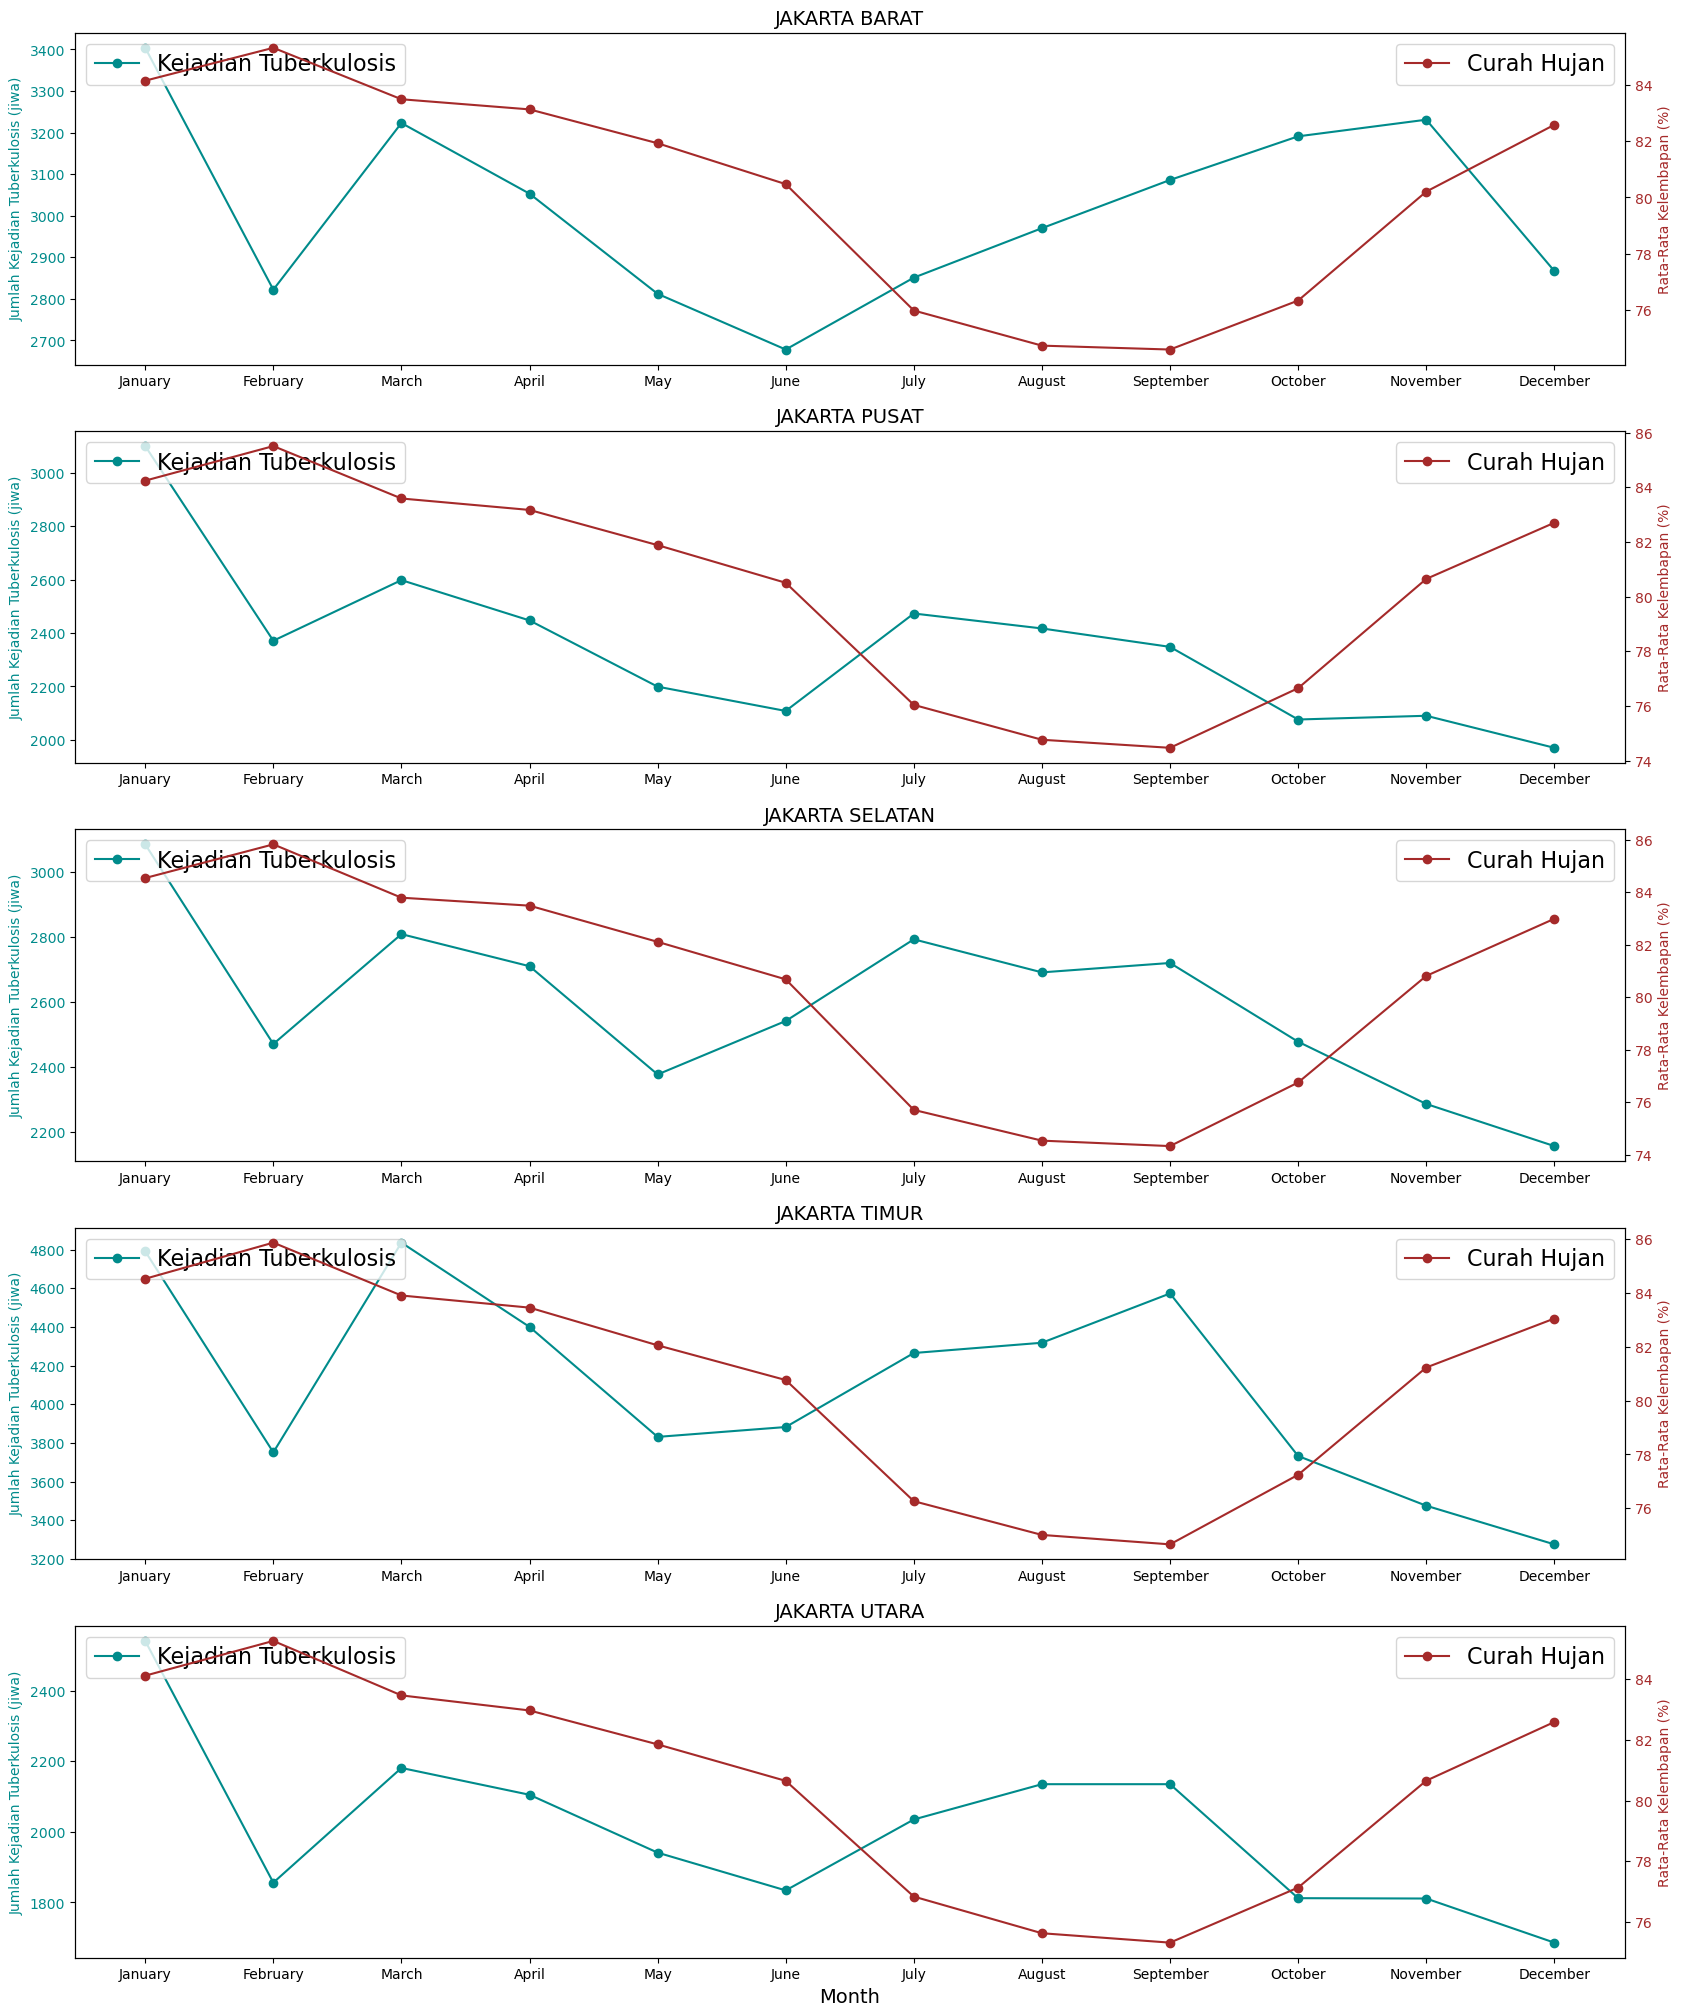

In [17]:
indicators = ['tb', 'rh']

# Group data by KABKOT
grouped_data = df_tb_rh.groupby('KABKOT')

# Plot time series for 'tb' and 'so2' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['rh']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Curah Hujan', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Kelembapan (%)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()